In [5]:
%pip install numpy pandas pillow opencv-python-headless matplotlib tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [7]:

image_dir = (r"C:\Users\adity\Downloads\archive (1)\images")
file_paths = os.listdir(image_dir)
print("List of files in the specified directory:\n")
print(file_paths)


List of files in the specified directory:

['abomasnow.png', 'abra.png', 'absol.png', 'accelgor.png', 'aegislash-blade.png', 'aerodactyl.png', 'aggron.png', 'aipom.png', 'alakazam.png', 'alomomola.png', 'altaria.png', 'amaura.png', 'ambipom.png', 'amoonguss.png', 'ampharos.png', 'anorith.png', 'araquanid.png', 'arbok.png', 'arcanine.png', 'arceus.png', 'archen.png', 'archeops.png', 'ariados.png', 'armaldo.png', 'aromatisse.png', 'aron.png', 'articuno.png', 'audino.png', 'aurorus.png', 'avalugg.png', 'axew.png', 'azelf.png', 'azumarill.png', 'azurill.png', 'bagon.png', 'baltoy.png', 'banette.png', 'barbaracle.png', 'barboach.png', 'basculin-red-striped.png', 'bastiodon.png', 'bayleef.png', 'beartic.png', 'beautifly.png', 'beedrill.png', 'beheeyem.png', 'beldum.png', 'bellossom.png', 'bellsprout.png', 'bergmite.png', 'bewear.png', 'bibarel.png', 'bidoof.png', 'binacle.png', 'bisharp.png', 'blacephalon.png', 'blastoise.png', 'blaziken.png', 'blissey.png', 'blitzle.png', 'boldore.png', 'bo

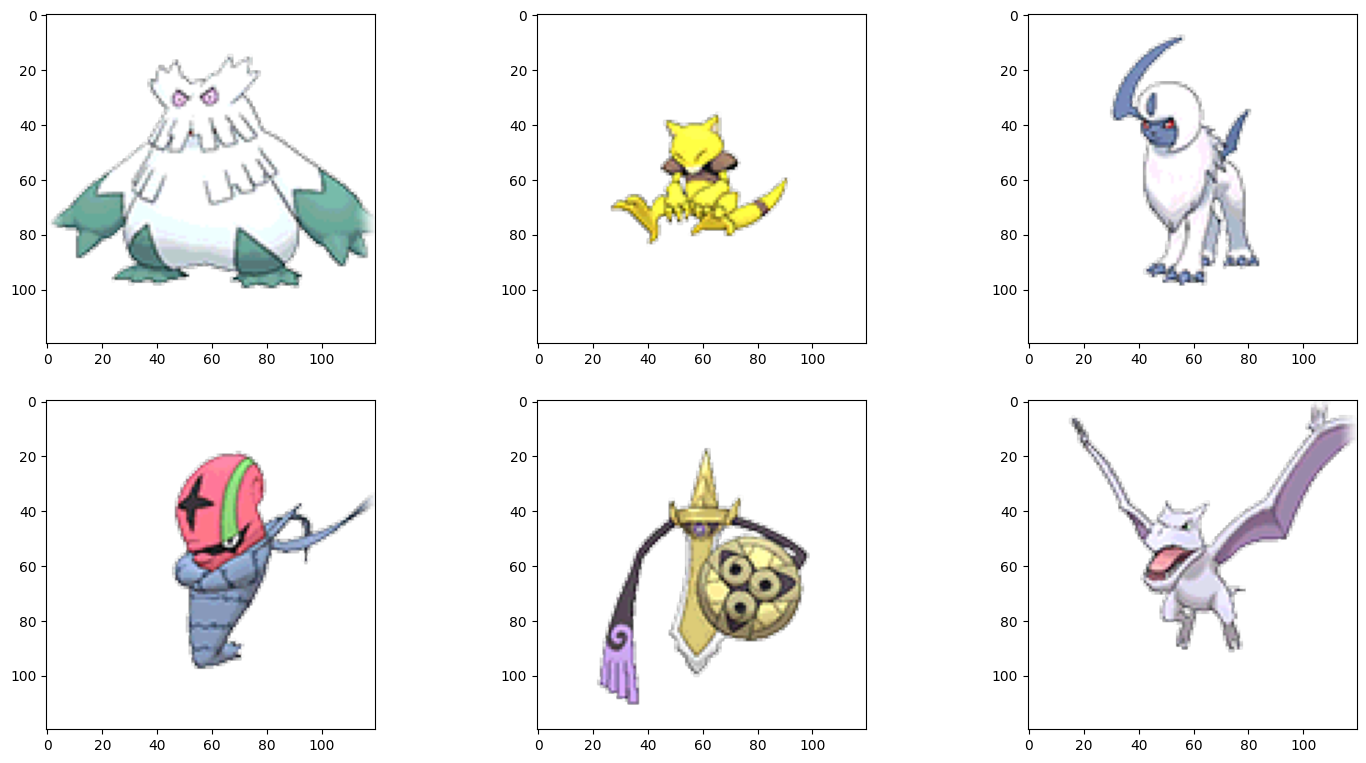

In [8]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sample_files = file_paths[:6]

def plot_samples():
    row, col = 0, 0
    for i, file in enumerate(sample_files):
        img_path = os.path.join(image_dir, file)
        img = Image.open(img_path)
        axes[row, col].imshow(img)
        
        if i == 2:
            row += 1
            col = 0
        else:
            col += 1

plt.tight_layout(pad=2)
plot_samples()


In [10]:

data_df = pd.read_csv(r"C:\Users\adity\Downloads\archive (1)\pokemon.csv")
data_dict = dict(zip(data_df["Name"], data_df["Type1"]))
print(data_dict)


{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [11]:

label_names = data_df["Type1"].unique()
label_ids = list(range(len(label_names)))
label_map = dict(zip(label_names, label_ids))
print(label_map)


{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [12]:

images = []
labels = []

for file in file_paths:
    img = cv2.imread(os.path.join(image_dir, file), cv2.COLOR_BGR2GRAY)
    label = label_map[data_dict[file.split(".")[0]]]
    images.append(np.array(img))
    labels.append(np.array(label))

images = np.array(images, dtype=np.float32) / 255.0
labels = np.array(labels, dtype=np.int8).reshape(-1, 1)


In [13]:

model = Sequential([
    Flatten(input_shape=(120, 120, 3)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(len(label_map))
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,320,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,342,118 (16.56 MB)

 Trainable params: 4,342,118 (16.56 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(images, labels, epochs=25)


Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0820 - loss: 3.0703
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.1827 - loss: 2.6016
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3045 - loss: 2.2952
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2900 - loss: 2.1396
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4015 - loss: 1.8342
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5402 - loss: 1.4608
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5886 - loss: 1.3006
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7002 - loss: 1.0425
Epoch 9/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8024 - loss: 0.7180
Epoch 10/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8223 - loss: 0.6165
Epoch 11/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9123 - loss: 0.3948
Epoch 12/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy:

In [15]:

probability_model = Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(images)

print("\n", predictions[0])
predicted_id = np.argmax(predictions[0])
print(f"\nPredicted ID: {predicted_id}\nType of Pokémon: {label_names[predicted_id]}")
print(f"Model accuracy: {history.history['accuracy'][-1]}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

 [9.9989438e-01 2.1493193e-19 4.5099087e-14 8.1927354e-19 2.7822267e-08
 3.4133991e-14 1.7624487e-13 6.5407200e-11 1.1659885e-08 6.3654878e-14
 9.1193371e-15 1.0058085e-04 2.0456077e-09 5.0806821e-06 5.9576674e-18
 1.9156916e-12 3.5868133e-09 8.5473888e-18]

Predicted ID: 0
Type of Pokémon: Grass
Model accuracy: 1.0
